In [5]:
# Linear Regression

In [6]:
from si.data import Dataset
from si.util.scale import StandardScaler
from si.util import summary
from si.supervised.linear_regression import LinearRegression, LinearRegressionReg
import numpy as np
import os

In [7]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'SIB/datasets/lr-example1.data')
dataset = Dataset.from_data(filename, labeled=True)
StandardScaler().fit_transform(dataset,inline=True)
summary(dataset)

,A,Y
mean,2.987301e-16,5.839135
var,1.000000e+00,30.049970
max,3.647694e+00,24.147000
min,-8.137648e-01,-2.680700


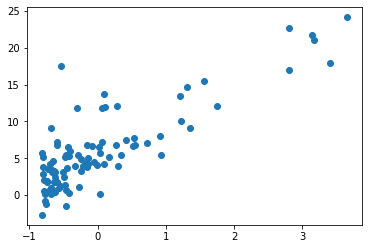

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1]==1:
    plt.scatter(dataset.X, dataset.Y)
    plt.show()


## Linear Regression using closed form

In [9]:
lr = LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


In [11]:
idx = 10
x = dataset.X[idx]
print("x = ",x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ",y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.9172763535616557
y_true =  3.2522


In [12]:
lr.cost()

4.476971375975178

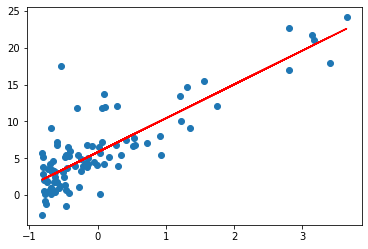

In [13]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.Y)
    plt.plot(lr.X[:,1], np.dot(lr.X, lr.theta), '-', color='red')
    plt.show()


## Linear Regression using gradient descent

In [14]:
lr = LinearRegression(gd=True,epochs=50000)
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.59304113]


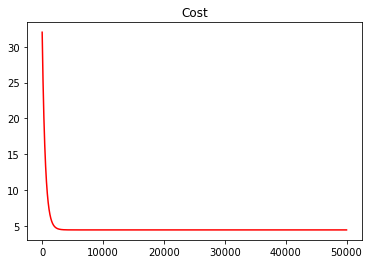

In [15]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

# Linear Regression with Regularization

In [22]:
lr = LinearRegressionReg()
lr.fit(dataset)
print('Theta = ', lr.theta)


TypeError: __init__() got an unexpected keyword argument 'gd'

In [ ]:
idx = 10
x = dataset.X[idx]
print("x = ", x)
y = dataset.y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


# Logistic Regression

In [ ]:
from si.supervised import LogisticRegression, LogisticRegressionReg
import pandas as pd

In [ ]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")
y = [int(x != 'Iris-setosa') for x in iris.y]
dataset = Dataset(iris.X[:,:2],np.array(y))
summary(dataset)

In [ ]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
plt.show()

In [ ]:
logreg = LogisticRegression(epochs=20000)

In [ ]:
logreg.fit(dataset)
logreg.theta

In [ ]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [ ]:
plt.plot(list(logreg.history.keys()), [ y[1] for y in logreg.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [ ]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


# Logistic Regression with L2 regularization

In [17]:
logreg = LogisticRegressionReg()
logreg.fit(dataset)
logreg.theta

NameError: name 'LogisticRegressionReg' is not defined

In [ ]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [ ]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))
